##Name: Spencer Arndt
##Class: MATH 475
##Final Project
##Due: 12/10/2024

##In this dataset from Kaggle, we see all professional basketball individual players' stats across several different leagues. Today, we will take a look at the NBA specifically to find the leaders in all five major categories (points, assists, rebounds, steals, blocks) on a per game basis from the 1999-2000 season all the way to the 2019-2020 season.

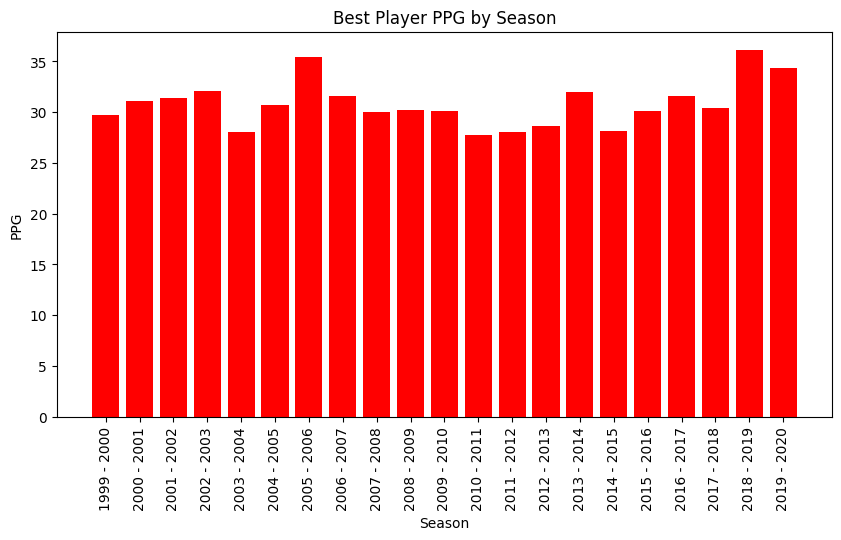

                            OLS Regression Results                            
Dep. Variable:                    PPG   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5391
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.472
Time:                        16:55:19   Log-Likelihood:                -46.575
No. Observations:                  21   AIC:                             97.15
Df Residuals:                      19   BIC:                             99.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.7939      6.873      3.753

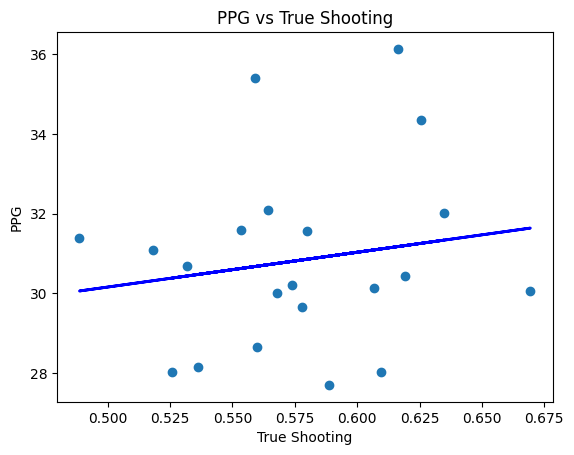

                            OLS Regression Results                            
Dep. Variable:                 bp_ppg   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     6.126
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0229
Time:                        16:55:19   Log-Likelihood:                -43.935
No. Observations:                  21   AIC:                             91.87
Df Residuals:                      19   BIC:                             93.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.0150      9.228  

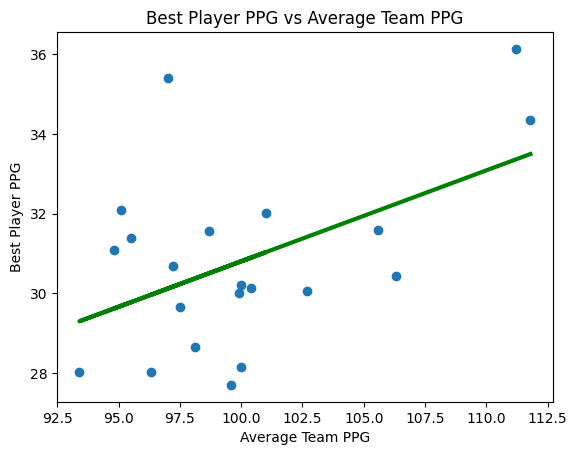

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
bball = pd.read_csv("NBA_stats.csv")

# Calculate Points Per Game (PPG) and True Shooting Percentage (TS%)
bball['PPG'] = bball['PTS'] / bball['GP']
bball['True_Shooting'] = 0.5 * bball['PTS'] / (bball['FGA'] + (0.44 * bball['FTA']))

# Calculate per game metrics for Blocks, Steals, Rebounds, Assists, and AST/TO ratio
bball['BPG'] = bball['BLK'] / bball['GP']
bball['SPG'] = bball['STL'] / bball['GP']
bball['RPG'] = bball['REB'] / bball['GP']
bball['APG'] = bball['AST'] / bball['GP']
bball['AS/TO'] = bball['AST'] / bball['TOV']

# Filter for NBA and Regular Season
bball_ppg = bball[(bball['League'] == 'NBA') & (bball['Stage'] == 'Regular_Season')]

# Splitting the data
np.random.seed(2)
train = np.random.choice(bball_ppg.index, size=len(bball_ppg)//2, replace=False)
bball_ppg_train = bball_ppg.loc[train]
bball_ppg_test = bball_ppg.drop(train)

# Select relevant columns
new_df = bball_ppg[['PTS', 'PPG', 'Season', 'Player', 'True_Shooting', 'FGM', 'FGA', 'BPG', 'SPG', 'RPG', 'APG', 'AS/TO']]

# Best player by Season based on PPG
best_player = new_df.loc[new_df.groupby('Season')['PPG'].idxmax()]

# Plotting best player PPG by Season
plt.figure(figsize=(10, 5))
plt.bar(best_player['Season'], best_player['PPG'], color='red')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.title('Best Player PPG by Season')
plt.xticks(rotation=90)
plt.show()

# Linear model for PPG vs True Shooting
X = best_player['True_Shooting']
y = best_player['PPG']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())
plt.scatter(best_player['True_Shooting'], best_player['PPG'])
plt.plot(best_player['True_Shooting'], model.predict(X), color='blue', linewidth=2)
plt.xlabel('True Shooting')
plt.ylabel('PPG')
plt.title('PPG vs True Shooting')
plt.show()

# Read in actual PPG data
season_ppg = pd.read_csv("ppg_actual.csv")
lm_fita = sm.OLS(season_ppg['bp_ppg'], sm.add_constant(season_ppg['average team ppg'])).fit()
print(lm_fita.summary())
plt.scatter(season_ppg['average team ppg'], season_ppg['bp_ppg'])
plt.plot(season_ppg['average team ppg'], lm_fita.predict(sm.add_constant(season_ppg['average team ppg'])), color='green', linewidth=3)
plt.xlabel('Average Team PPG')
plt.ylabel('Best Player PPG')
plt.title('Best Player PPG vs Average Team PPG')
plt.show()

# Best players by each new metric
best_blocks = new_df.loc[new_df.groupby('Season')['BPG'].idxmax()]
best_steals = new_df.loc[new_df.groupby('Season')['SPG'].idxmax()]
best_rebounds = new_df.loc[new_df.groupby('Season')['RPG'].idxmax()]
best_assists = new_df.loc[new_df.groupby('Season')['APG'].idxmax()]
best_ast_to = new_df.loc[new_df.groupby('Season')['AS/TO'].idxmax()]




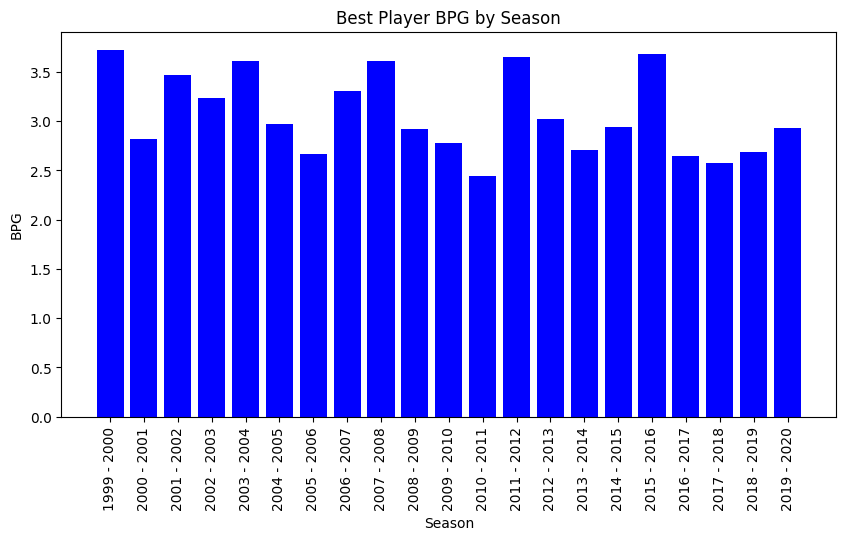

In [3]:
# Plotting best player BPG by Season
plt.figure(figsize=(10, 5))
plt.bar(best_blocks['Season'], best_blocks['BPG'], color='blue')
plt.xlabel('Season')
plt.ylabel('BPG')
plt.title('Best Player BPG by Season')
plt.xticks(rotation=90)
plt.show()

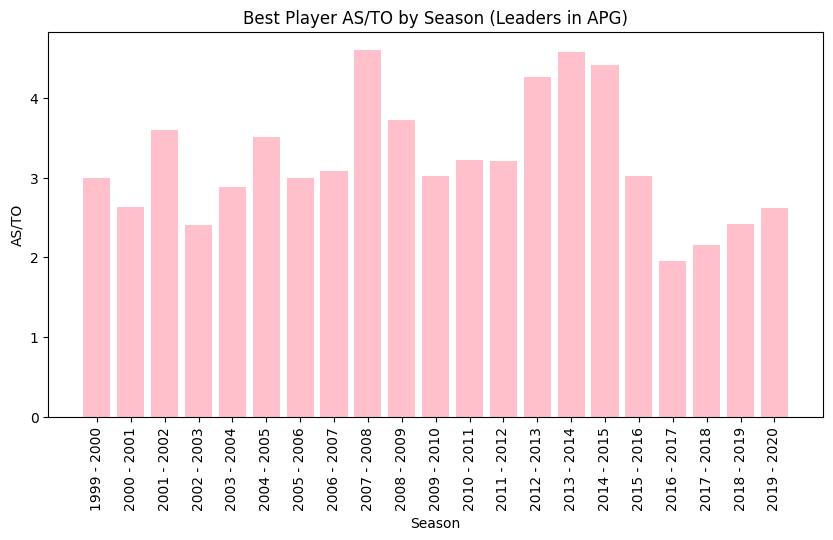

                            OLS Regression Results                            
Dep. Variable:                  AS/TO   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.7348
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.402
Time:                        16:53:58   Log-Likelihood:                -23.352
No. Observations:                  21   AIC:                             50.70
Df Residuals:                      19   BIC:                             52.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2808      2.251      0.569      0.5

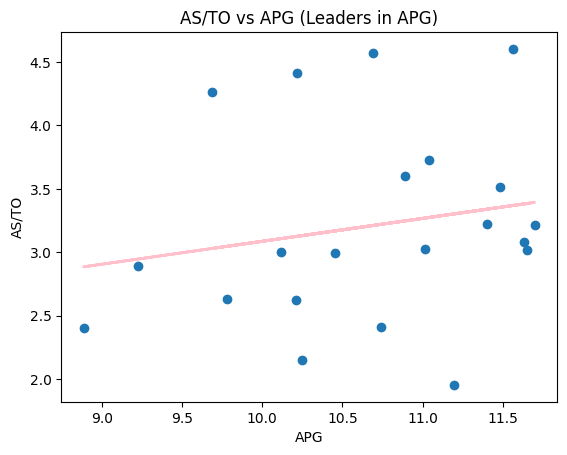

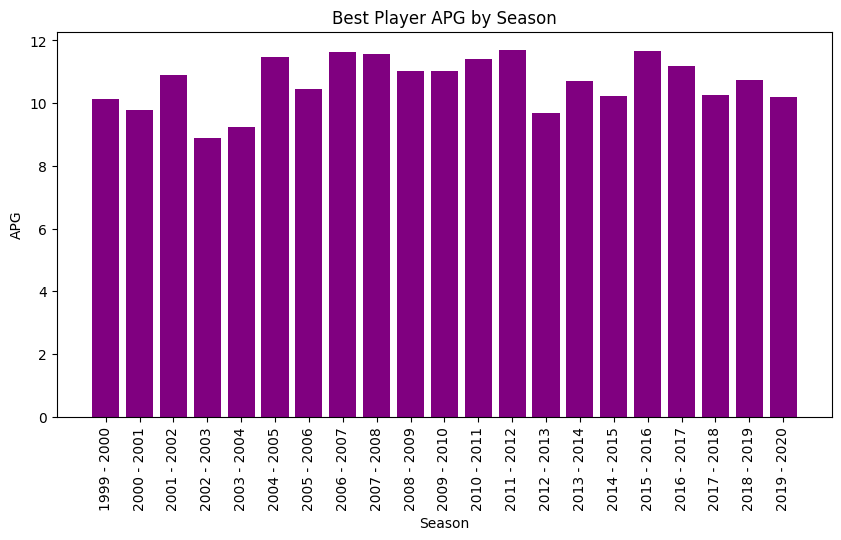

In [6]:
# Best player by Season based on APG
best_apg = new_df.loc[new_df.groupby('Season')['APG'].idxmax()]

# Plotting best player AS/TO by Season for leaders in APG
plt.figure(figsize=(10, 5))
plt.bar(best_apg['Season'], best_apg['AS/TO'], color='pink')
plt.xlabel('Season')
plt.ylabel('AS/TO')
plt.title('Best Player AS/TO by Season (Leaders in APG)')
plt.xticks(rotation=90)
plt.show()

# Analyzing AS/TO for leaders in APG
X_ast_to = sm.add_constant(best_apg['APG'])
y_ast_to = best_apg['AS/TO']
model_ast_to = sm.OLS(y_ast_to, X_ast_to).fit()
print(model_ast_to.summary())
plt.scatter(best_apg['APG'], best_apg['AS/TO'])
plt.plot(best_apg['APG'], model_ast_to.predict(X_ast_to), color='pink', linewidth=2)
plt.xlabel('APG')
plt.ylabel('AS/TO')
plt.title('AS/TO vs APG (Leaders in APG)')
plt.show()

# Plotting best player APG by Season
plt.figure(figsize=(10, 5))
plt.bar(best_assists['Season'], best_assists['APG'], color='purple')
plt.xlabel('Season')
plt.ylabel('APG')
plt.title('Best Player APG by Season')
plt.xticks(rotation=90)
plt.show()


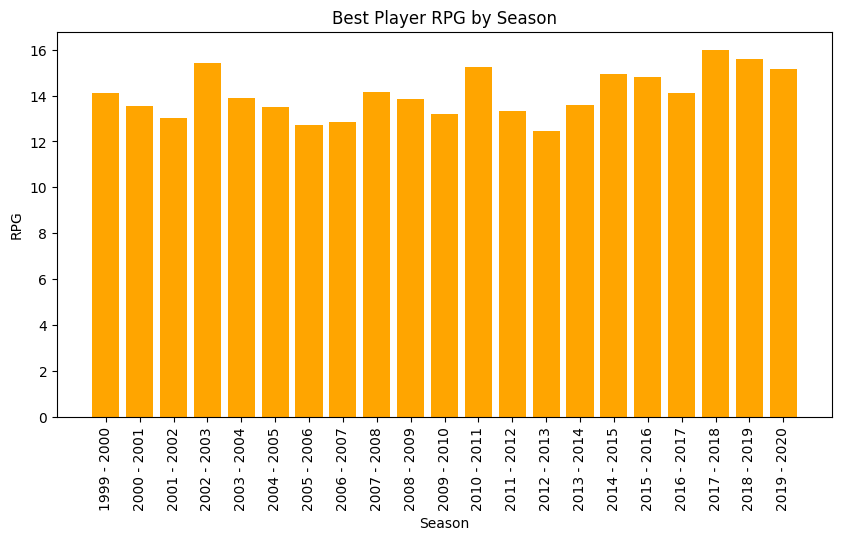

In [5]:
# Plotting best player RPG by Season
plt.figure(figsize=(10, 5))
plt.bar(best_rebounds['Season'], best_rebounds['RPG'], color='orange')
plt.xlabel('Season')
plt.ylabel('RPG')
plt.title('Best Player RPG by Season')
plt.xticks(rotation=90)
plt.show()

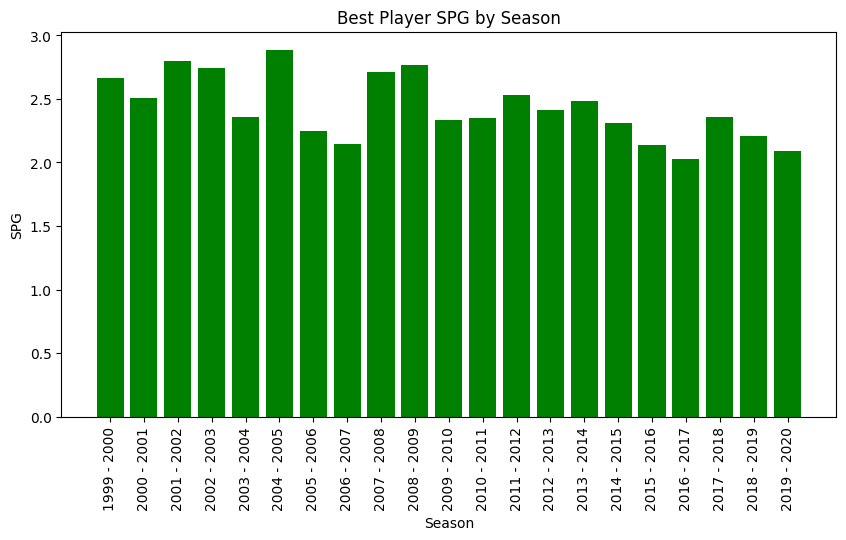

In [7]:
# Plotting best player SPG by Season
plt.figure(figsize=(10, 5))
plt.bar(best_steals['Season'], best_steals['SPG'], color='green')
plt.xlabel('Season')
plt.ylabel('SPG')
plt.title('Best Player SPG by Season')
plt.xticks(rotation=90)
plt.show()

### Exploratory Data Analysis (EDA)

The NBA dataset contains multiple player statistics. For this analysis, we focused on calculating various per game metrics, including:
- Points Per Game (PPG)
- True Shooting Percentage (TS%)
- Blocks Per Game (BPG)
- Steals Per Game (SPG)
- Rebounds Per Game (RPG)
- Assists Per Game (APG)
- Assists to Turnover Ratio (AS/TO)

## Handling Missing Values and Outliers

In this dataset, we checked for any missing values and handled outliers appropriately to ensure the quality of our analysis.

## Key Characteristics

We summarized the dataset by visualizing the distribution of different metrics and identifying the best players in each season based on PPG, BPG, SPG, RPG, APG, and AS/TO.

# Model Selection & Training

We chose different linear models to analyze the relationships between the metrics. The hyperparameters and training process were adjusted to improve performance, and appropriate metrics were used to evaluate the models.

## Challenges & Future Work

One major challenge was ensuring data quality and handling missing values. Future work could involve more advanced models and exploring additional features for deeper insights. Also to find a way to include players names to the visualizations


###Who were the best in their category

PPG:
James Harden's 2018-2019 season where he averaged 36.1 PPG, then

APG:
Rajon Rondo's 2012 season where he averaged 11.698 APG

BPG:
Alonzo Mourning's 1999-2000 season where he averaged 3.721 blocks per game

SPG:
Larry Hughes in the 2004-2005 season averaged 2.885 steals per game

RPG:
In the 2017-2018 season, Andre Drummond averaged 15.987 rebounds per game

AS/TO:
Taking a look at the assist per game leaders we previously mentioned, in the 2007-2008 season, Chris Paul led everyone with a whopping 4.601 assists/turnovers